In [18]:
import pandas as pd
import geopandas as gpd
import shapely as shp
import fns as f

In [2]:
gdf = gpd.read_file('../outputs/geojson/ca_boundary.geojson')

In [3]:
gdf

,gid,arealand,division,intptlat,name,objectid,areawater,intptlon,oid,funcstat,...,state,statens,centlat,basename,mtfcc,region,lsadc,geoid,geo_point_2d,geometry
0,48,-222385618,9,37.155177,California,14,-1011556647,-119.543418,239405626,A,...,06,01779778,37.154735,California,G4000,4,00,06,"{'lon': -119.663749804, 'lat': 37.2153570137}","MULTIPOLYGON (((-124.13656 41.46445, -124.1441..."


<Axes: >

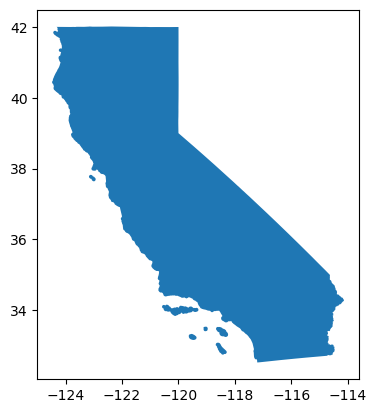

In [4]:
gdf.plot()

In [61]:
grid_cells = []
grid_size = 0.1
for x in range(-12445,-11405+10,10):
    for y in range(3245, 4185+10,10):
        grid_cells.append(f.polysquare(x,y,5,100))
cell = gpd.GeoDataFrame(grid_cells, columns=['geometry'], crs=4326)

In [62]:
cell

,geometry
0,"POLYGON ((-124.40000 32.40000, -124.40000 32.5..."
1,"POLYGON ((-124.40000 32.50000, -124.40000 32.6..."
2,"POLYGON ((-124.40000 32.60000, -124.40000 32.7..."
3,"POLYGON ((-124.40000 32.70000, -124.40000 32.8..."
4,"POLYGON ((-124.40000 32.80000, -124.40000 32.9..."
...,...
9970,"POLYGON ((-114.00000 41.40000, -114.00000 41.5..."
9971,"POLYGON ((-114.00000 41.50000, -114.00000 41.6..."
9972,"POLYGON ((-114.00000 41.60000, -114.00000 41.7..."
9973,"POLYGON ((-114.00000 41.70000, -114.00000 41.8..."


In [63]:
mask = cell.intersects(gdf['geometry'][0])
mask

0       False
1       False
2       False
3       False
4       False
        ...  
9970    False
9971    False
9972    False
9973    False
9974    False
Length: 9975, dtype: bool

In [64]:
index = [i for (i, v) in zip(range(0,9975), mask) if v]

In [72]:
pd.Series(index,name='keep').to_csv('outputs/geojson/ca_grid_keep.csv',index=False)

In [66]:
drop = [i for (i, v) in zip(range(0,9975), mask) if not v]

In [71]:
pd.Series(drop,name='drop').to_csv('outputs/geojson/ca_grid_drop.csv',index=False)

<Axes: >

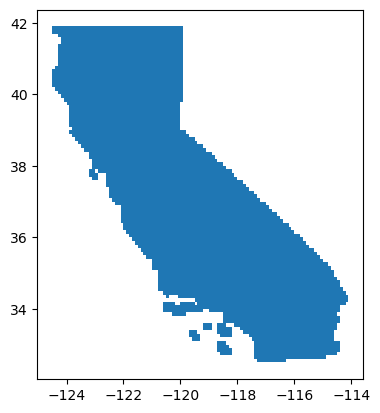

In [68]:
CAcell = cell.drop(index=drop)
CAcell.plot()